Pada Tugas kali ini kita akan membuat 4 function yang memiliki fungsinya masing-masing.
Data yang diambil berasal dari berkas imdb_movie_dumpfile.sql
Silahkan import dumpfile tersebut dengan menggunakan terminal/cmd.

Jika ada proses yang dilakukan boleh dilakukan dari query sql, atau menggunakan python setelah semua data ditampilkan menggunakan sql. 

In [84]:
#Taruh semua library/package dsini

from mysql.connector import connect
from dotenv import dotenv_values
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
#Pada sel ini peserta diminta untuk melakukan koneksi terhadap database.

params = {
    "db": dotenv_values("E:\Projects\python\pds2022\day29\materi\.env")
}

db_user = params['db']['MYSQL_USERNAME']
db_password = params['db']['MYSQL_PASSWORD']
db_host = params['db']['MYSQL_HOST']
db_port = params['db']['MYSQL_PORT']
db_name = params['db']['MYSQL_DB']

db = connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

if db:
    print(db)
    print("Database berhasil terkoneksi")


Database berhasil terkoneksi


1. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 5 direktur dengan jumlah film terbanyak dalam daftar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 5.

In [86]:
def most_maker_director():
    query = f'''
        select director_name, count(director_name) as num_of_film
        from movies
        group by director_name
        order by num_of_film desc
        limit 5;
    '''
    cursor_db = db.cursor()
    cursor_db.execute(query)
    records = cursor_db.fetchall()
    num = 0
    for row in records:
        num+=1
        print(f"{num}. {row[0]}")

try:
    most_maker_director()
    print("> Data berhasil ditampilkan")
except Exception as e:
    print(f"> Data gagal ditampilkan: {e}")

1. Steven Spielberg
2. Woody Allen
3. Martin Scorsese
4. Clint Eastwood
5. Ridley Scott
> Data berhasil ditampilkan


2. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 10 direktur dengan total jumlah pendapatan terbesar untuk semua film yang dia buat. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 10 beserta total pendapatan dari masing-masing direktur.

Pendapatan bisa didapatkan dari nilai gross

In [87]:
def most_profitable_director():
    query = f'''
        select director_name, sum(gross) as total_gross
        from movies
        group by director_name
        order by total_gross desc
        limit 10;
    '''
    cursor_db = db.cursor()
    cursor_db.execute(query)
    records = cursor_db.fetchall()
    num = 0
    for row in records:
        num += 1
        print(f"{num}. {row[0]} - {row[1]:,.2f}")

try:
    most_profitable_director()
    print("> Data berhasil ditampilkan")
except Exception as e:
    print(f"> Data gagal ditampilkan: {e}")

1. Steven Spielberg - 4,114,233,101.00
2. Peter Jackson - 2,592,969,279.00
3. Michael Bay - 2,231,242,537.00
4. Tim Burton - 2,071,275,480.00
5. Sam Raimi - 2,049,549,198.00
6. James Cameron - 1,948,125,910.00
7. Christopher Nolan - 1,813,227,576.00
8. George Lucas - 1,741,418,480.00
9. Joss Whedon - 1,730,886,628.00
10. Robert Zemeckis - 1,619,309,108.00
> Data berhasil ditampilkan


3. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 15 film dengan pendapatan terbesar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 15 beserta pendapatan dari masing-masing film

In [88]:
def most_profitable_movie():
    query = f'''
        select movie_title, title_year, gross
        from movies
        group by movie_title
        order by gross desc
        limit 15;
    '''
    cursor_db = db.cursor()
    cursor_db.execute(query)
    records = cursor_db.fetchall()
    num = 0
    for row in records:
        num += 1
        print(f"{num}. {row[0]} ({int(row[1])}) - {row[2]:,.2f}")

try:
    most_profitable_movie()
    print("> Data berhasil ditampilkan")
except Exception as e:
    print(f"> Data gagal ditampilkan: {e}")

1. Avatar  (2009) - 760,505,847.00
2. Titanic  (1997) - 658,672,302.00
3. Jurassic World  (2015) - 652,177,271.00
4. The Avengers  (2012) - 623,279,547.00
5. The Dark Knight  (2008) - 533,316,061.00
6. Star Wars: Episode I - The Phantom Menace  (1999) - 474,544,677.00
7. Star Wars: Episode IV - A New Hope  (1977) - 460,935,665.00
8. Avengers: Age of Ultron  (2015) - 458,991,599.00
9. The Dark Knight Rises  (2012) - 448,130,642.00
10. Shrek 2  (2004) - 436,471,036.00
11. E.T. the Extra-Terrestrial  (1982) - 434,949,459.00
12. The Hunger Games: Catching Fire  (2013) - 424,645,577.00
13. Pirates of the Caribbean: Dead Man's Chest  (2006) - 423,032,628.00
14. The Lion King  (1994) - 422,783,777.00
15. Toy Story 3  (2010) - 414,984,497.00
> Data berhasil ditampilkan


4. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan plot distribusi budget dari semua film pada tahun yang ditentukan. fungsi ini memiliki input, yaitu adalah tahun.

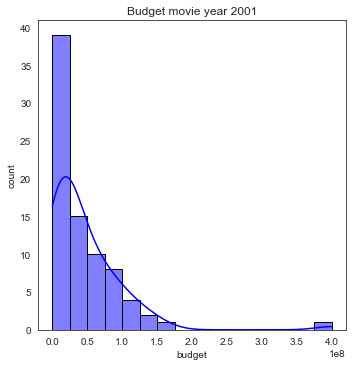

> Grafik berhasil ditampilkan


In [89]:
# select budget, count(budget) as count
def budget_distribution(year):
    query = f'''
        select budget, count(budget) as count
        from movies
        where title_year = {year}
        group by budget;
    '''
    cursor_db = db.cursor()
    cursor_db.execute(query)
    records = cursor_db.fetchall()
    df = pd.DataFrame(records, columns=['budget', 'count'])

    with sns.axes_style("white"):
        plt.style.use('seaborn-deep')
        g = sns.displot(data=df, x="budget", kde=True, color='b', edgecolor="black")
        g.despine(top=False, right=False)
        plt.title(f'Budget movie year {year}')
        plt.ylabel('count')
        plt.show()

try:
    budget_distribution(2001)
    print("> Grafik berhasil ditampilkan")
except Exception as e:
    print(f"> Grafik gagal ditampilkan: {e}")

Semua sel di bawah digunakan untuk pemanggilan fungsi dan menunjukan hasil yang diharapkan.

In [90]:
most_maker_director()

1. Steven Spielberg
2. Woody Allen
3. Martin Scorsese
4. Clint Eastwood
5. Ridley Scott


In [91]:
most_profitable_director()

1. Steven Spielberg - 4,114,233,101.00
2. Peter Jackson - 2,592,969,279.00
3. Michael Bay - 2,231,242,537.00
4. Tim Burton - 2,071,275,480.00
5. Sam Raimi - 2,049,549,198.00
6. James Cameron - 1,948,125,910.00
7. Christopher Nolan - 1,813,227,576.00
8. George Lucas - 1,741,418,480.00
9. Joss Whedon - 1,730,886,628.00
10. Robert Zemeckis - 1,619,309,108.00


In [92]:
most_profitable_movie()

1. Avatar  (2009) - 760,505,847.00
2. Titanic  (1997) - 658,672,302.00
3. Jurassic World  (2015) - 652,177,271.00
4. The Avengers  (2012) - 623,279,547.00
5. The Dark Knight  (2008) - 533,316,061.00
6. Star Wars: Episode I - The Phantom Menace  (1999) - 474,544,677.00
7. Star Wars: Episode IV - A New Hope  (1977) - 460,935,665.00
8. Avengers: Age of Ultron  (2015) - 458,991,599.00
9. The Dark Knight Rises  (2012) - 448,130,642.00
10. Shrek 2  (2004) - 436,471,036.00
11. E.T. the Extra-Terrestrial  (1982) - 434,949,459.00
12. The Hunger Games: Catching Fire  (2013) - 424,645,577.00
13. Pirates of the Caribbean: Dead Man's Chest  (2006) - 423,032,628.00
14. The Lion King  (1994) - 422,783,777.00
15. Toy Story 3  (2010) - 414,984,497.00


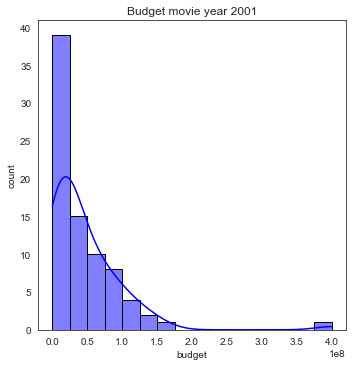

In [93]:
year = 2001
budget_distribution(2001)
